In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sales_df = pd.read_csv("Sales_Data.csv")
sales_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,NaN,41


In [3]:
sales_df.isnull().sum()

Date                   0
Product Name           0
Product Quantity       0
Units sold             0
Day                    0
Month                  0
Year                   0
DayOfWeek              0
Category               0
DayType                0
Rainfall            2103
Week_of_Year           0
dtype: int64

In [4]:
df = sales_df
df.dropna(inplace=True)

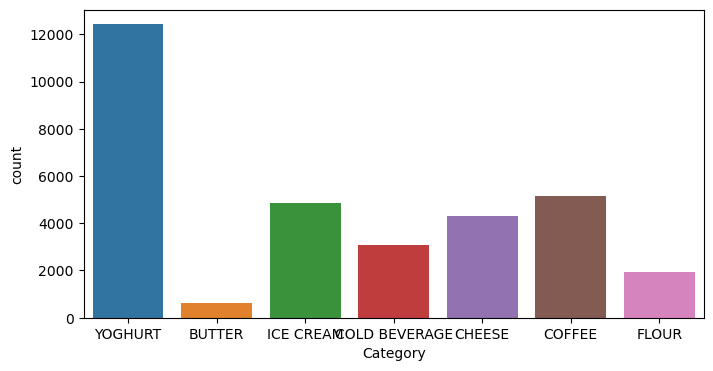

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(x='Category', data=df)
plt.show()

C:\Users\arkha\AppData\Local\Temp\ipykernel_27864\1516450634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array


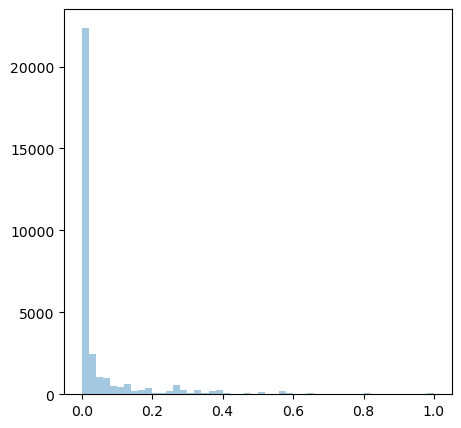

In [6]:
plt.figure(figsize=(5, 5))
sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df = sales_df
label_encoder =  LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# the input features (x) and the output variable (y) is defined
input = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target_variable = 'Category'

x = df[input]
y = df[target_variable]

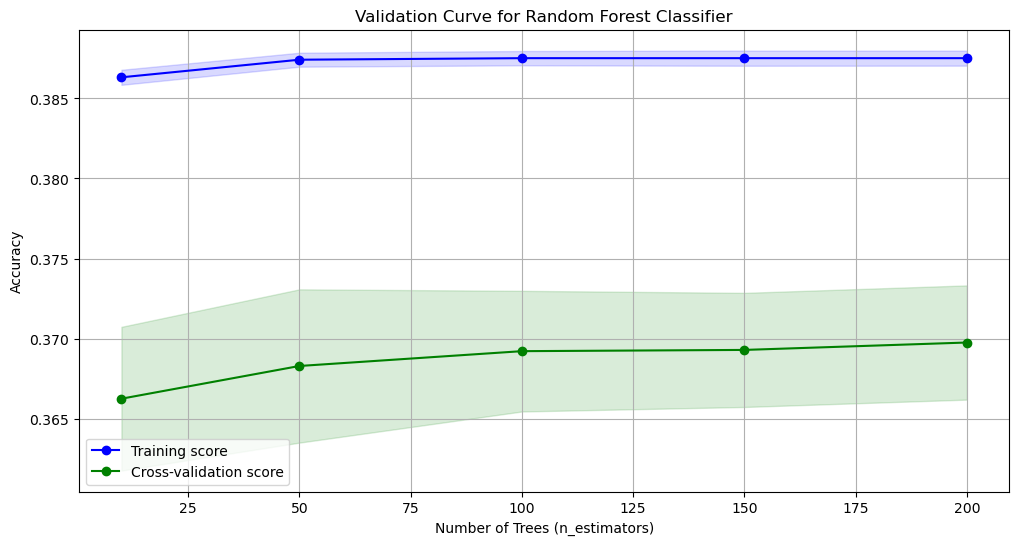

In [9]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vary the number of trees (n_estimators)
param_range = [10, 50, 100, 150, 200]  

# Calculate training and test scores for varying parameter values
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    x_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# the mean and standard deviation is calculated for the training score and the testing score
training_mean = np.mean(train_scores, axis=1)
training_std = np.std(train_scores, axis=1)
testing_mean = np.mean(test_scores, axis=1)
testing_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(12, 6))
plt.plot(param_range, training_mean, label="Training score", color="blue", marker="o")
plt.fill_between(param_range, training_mean - training_std, training_mean + training_std, alpha=0.15, color="blue")
plt.plot(param_range, testing_mean, label="Cross-validation score", color="green", marker="o")
plt.fill_between(param_range, testing_mean - testing_std, testing_mean + testing_std, alpha=0.15, color="green")

plt.title("Validation Curve for Random Forest Classifier")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Accuracy: 0.3734772552043177
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       132
       CHEESE       0.00      0.00      0.00       874
       COFFEE       0.15      0.01      0.01      1042
COLD BEVERAGE       0.00      0.00      0.00       626
        FLOUR       0.00      0.00      0.00       382
    ICE CREAM       0.25      0.00      0.01       998
      YOGHURT       0.38      0.99      0.54      2431

     accuracy                           0.37      6485
    macro avg       0.11      0.14      0.08      6485
 weighted avg       0.20      0.37      0.21      6485



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


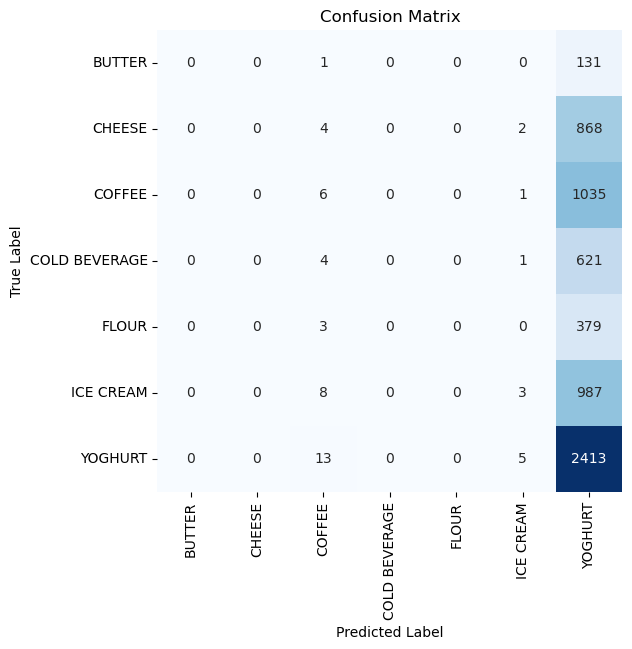

In [10]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# The model is trained
classifier.fit(x_train, y_train)

# The model makes predictions
y_prediction = classifier.predict(x_test)

# The model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

With maximum depth of 10, accuracy is 37.34%

Accuracy: 0.3688511950655359
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       132
       CHEESE       0.00      0.00      0.00       874
       COFFEE       0.16      0.01      0.02      1042
COLD BEVERAGE       0.00      0.00      0.00       626
        FLOUR       0.00      0.00      0.00       382
    ICE CREAM       0.20      0.02      0.04       998
      YOGHURT       0.38      0.97      0.54      2431

     accuracy                           0.37      6485
    macro avg       0.10      0.14      0.09      6485
 weighted avg       0.20      0.37      0.21      6485



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


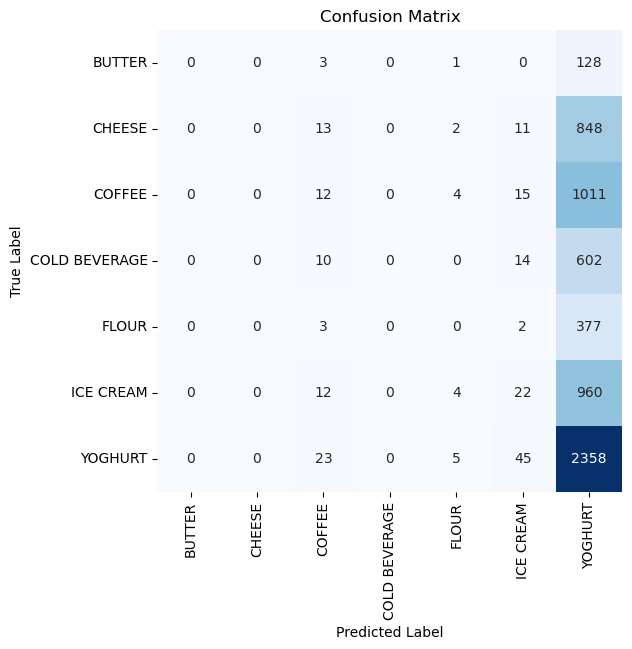

In [11]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

# The model is trained
classifier.fit(x_train, y_train)

# The model makes predictions
y_prediction = classifier.predict(x_test)

# The model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

When the max depth is doubled to 20, accuracy decreases to 36.89%

Accuracy: 0.3748650732459522
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       132
       CHEESE       0.00      0.00      0.00       874
       COFFEE       0.00      0.00      0.00      1042
COLD BEVERAGE       0.00      0.00      0.00       626
        FLOUR       0.00      0.00      0.00       382
    ICE CREAM       0.00      0.00      0.00       998
      YOGHURT       0.37      1.00      0.55      2431

     accuracy                           0.37      6485
    macro avg       0.05      0.14      0.08      6485
 weighted avg       0.14      0.37      0.20      6485



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


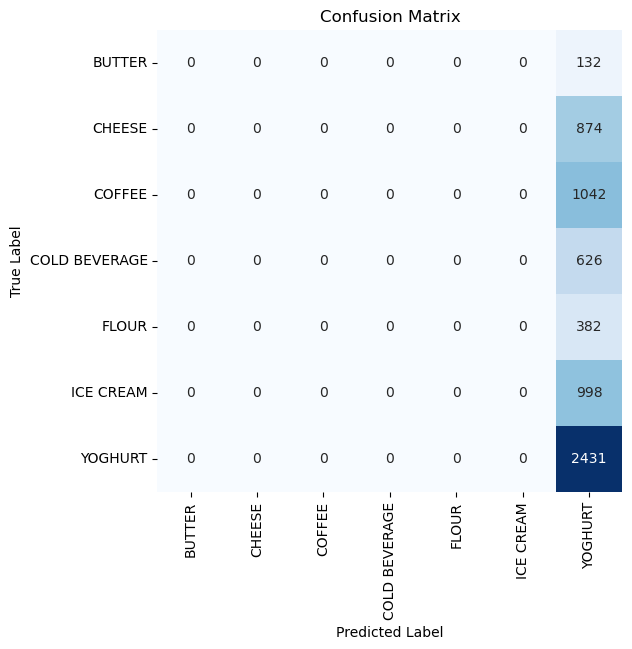

In [12]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# The model is trained
classifier.fit(x_train, y_train)

# The model makes predictions
y_prediction = classifier.predict(x_test)

# The model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

When max depth is halved to five, accuracy increases to 37.49%

Accuracy: 0.3805901100030842


c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       199
       CHEESE       0.00      0.00      0.00      1274
       COFFEE       0.00      0.00      0.00      1584
COLD BEVERAGE       0.00      0.00      0.00       946
        FLOUR       0.00      0.00      0.00       578
    ICE CREAM       0.00      0.00      0.00      1444
      YOGHURT       0.38      1.00      0.55      3702

     accuracy                           0.38      9727
    macro avg       0.05      0.14      0.08      9727
 weighted avg       0.14      0.38      0.21      9727



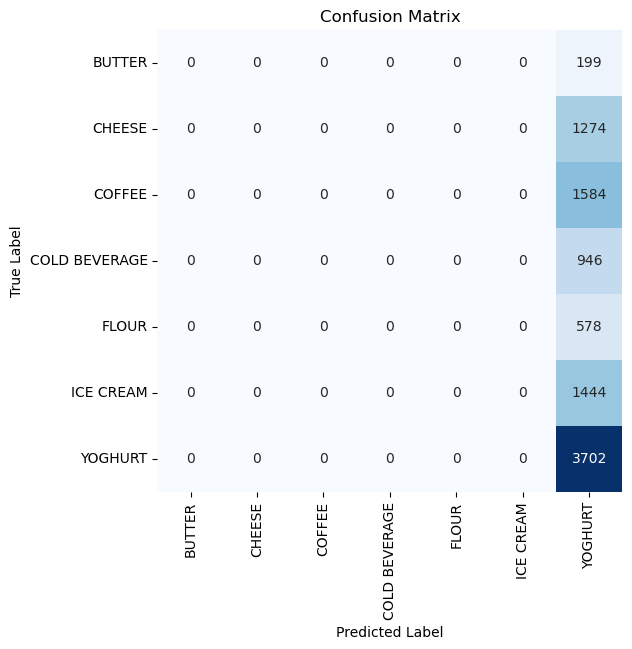

In [13]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf= 10, random_state=42)

# The model is trained
classifier.fit(x_train, y_train)

# The model makes predictions
y_prediction = classifier.predict(x_test)

# The model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.3805901100030842


c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       199
       CHEESE       0.00      0.00      0.00      1274
       COFFEE       0.00      0.00      0.00      1584
COLD BEVERAGE       0.00      0.00      0.00       946
        FLOUR       0.00      0.00      0.00       578
    ICE CREAM       0.00      0.00      0.00      1444
      YOGHURT       0.38      1.00      0.55      3702

     accuracy                           0.38      9727
    macro avg       0.05      0.14      0.08      9727
 weighted avg       0.14      0.38      0.21      9727



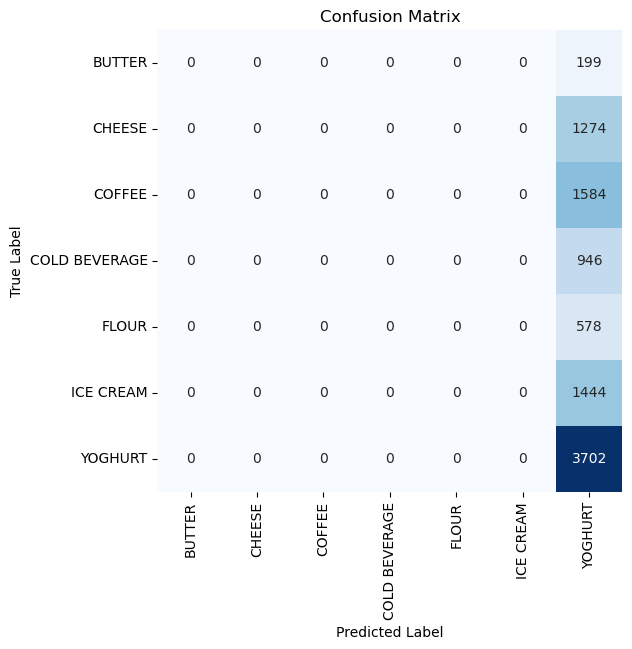

In [14]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf= 20, random_state=42)

# The model is trained
classifier.fit(x_train, y_train)

# The model makes predictions
y_prediction = classifier.predict(x_test)

# The model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.3805901100030842


c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       199
       CHEESE       0.00      0.00      0.00      1274
       COFFEE       0.00      0.00      0.00      1584
COLD BEVERAGE       0.00      0.00      0.00       946
        FLOUR       0.00      0.00      0.00       578
    ICE CREAM       0.00      0.00      0.00      1444
      YOGHURT       0.38      1.00      0.55      3702

     accuracy                           0.38      9727
    macro avg       0.05      0.14      0.08      9727
 weighted avg       0.14      0.38      0.21      9727



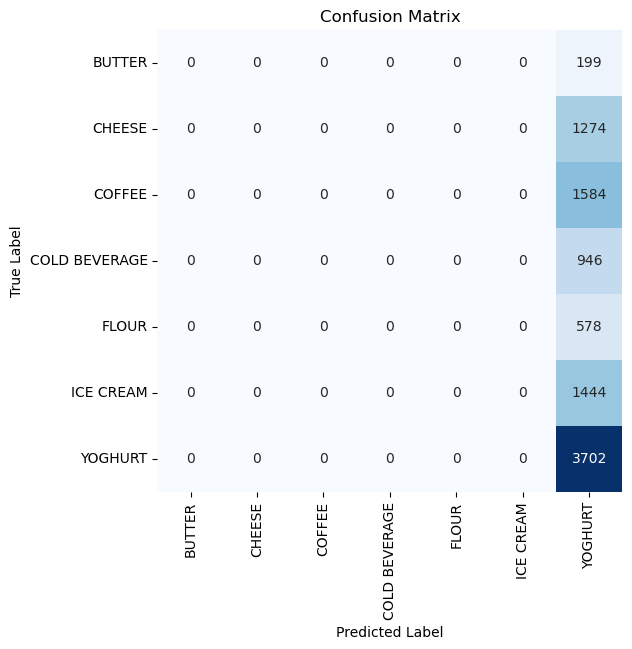

In [15]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf= 5, random_state=42)

# The model is trained
classifier.fit(x_train, y_train)

# The model makes predictions
y_prediction = classifier.predict(x_test)

# The model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

It could be stated that changing the number of minimum sample leafs does not cause a significant change in the value of the accuracy.

##### Thus let us try to get the highest accuracy with the optimal features.

Accuracy: 0.3805901100030842


c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       199
       CHEESE       0.00      0.00      0.00      1274
       COFFEE       0.00      0.00      0.00      1584
COLD BEVERAGE       0.00      0.00      0.00       946
        FLOUR       0.00      0.00      0.00       578
    ICE CREAM       0.00      0.00      0.00      1444
      YOGHURT       0.38      1.00      0.55      3702

     accuracy                           0.38      9727
    macro avg       0.05      0.14      0.08      9727
 weighted avg       0.14      0.38      0.21      9727



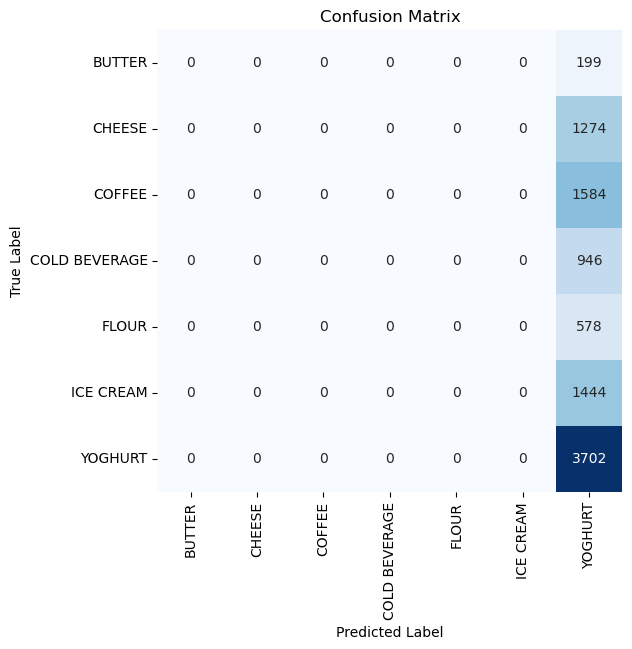

In [16]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


classifier = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf= 20, random_state=42)

# The model is trained
classifier.fit(x_train, y_train)

# The model makes predictions
y_prediction = classifier.predict(x_test)

# The model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This produces the highest accuracy score of 38.06%